### Driven Data Pump it Up Challenge:

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import os
#os.environ["PROJ_LIB"] = "C:\\Users\\rtalebiz\\AppData\\Local\\Continuum\\anaconda3\\Library\\share"
#from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

#### Let's look at our data using .info(), .shape and .head() methods

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [7]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### We notice that some of our features like *(funder, installer, subvillage, public_meeting, scheme_management, scheme_name and permit)* have missing values. We need to look at these features and decide if they have a vitale role in predicting which pump is likely to stop working. Also, some of these features have duplicate data like *funder and installer* so I would likely drop one of them.

In [8]:
df.shape

(59400, 41)

#### Our dataset has 59,400 datapoints and 41 features. Now let's look at a few datapoints using .head()

In [9]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### I'll be looking at some of these features and dropping the ones with duplicate data as well as figuring out a way to fill all the NaNs and/or 0s

#### Now let's look at the amount of each functional type pumps in our dataset

In [10]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
print('Count of each functional type:' + '\n' + str(df.status_group.value_counts()))
print('\n' + 'Percent of each functional type:' + '\n' + str(df.status_group.value_counts(normalize=True)))

Count of each functional type:
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Percent of each functional type:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


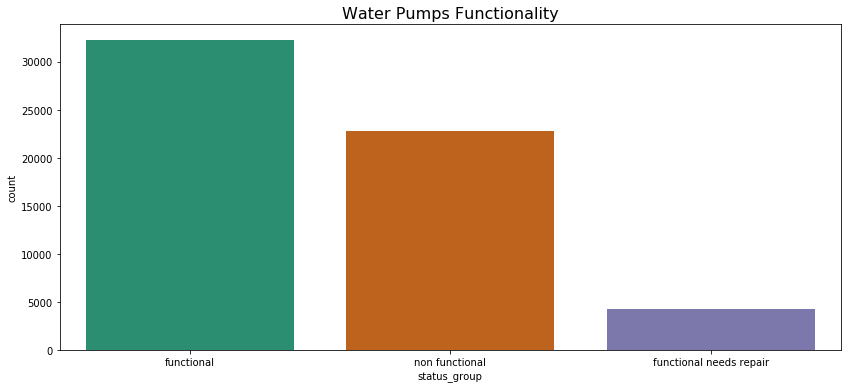

In [11]:
plt.figure(figsize=(14,6))
plt.title("Water Pumps Functionality",fontsize=16)
sns.countplot(x=df['status_group'], data=df, palette='Dark2')

#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional pump.

### Now let's separate our Numerical and Categorical features and visualize some of the most sensitive columns

In [12]:
sensitive_num_features = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year'
]

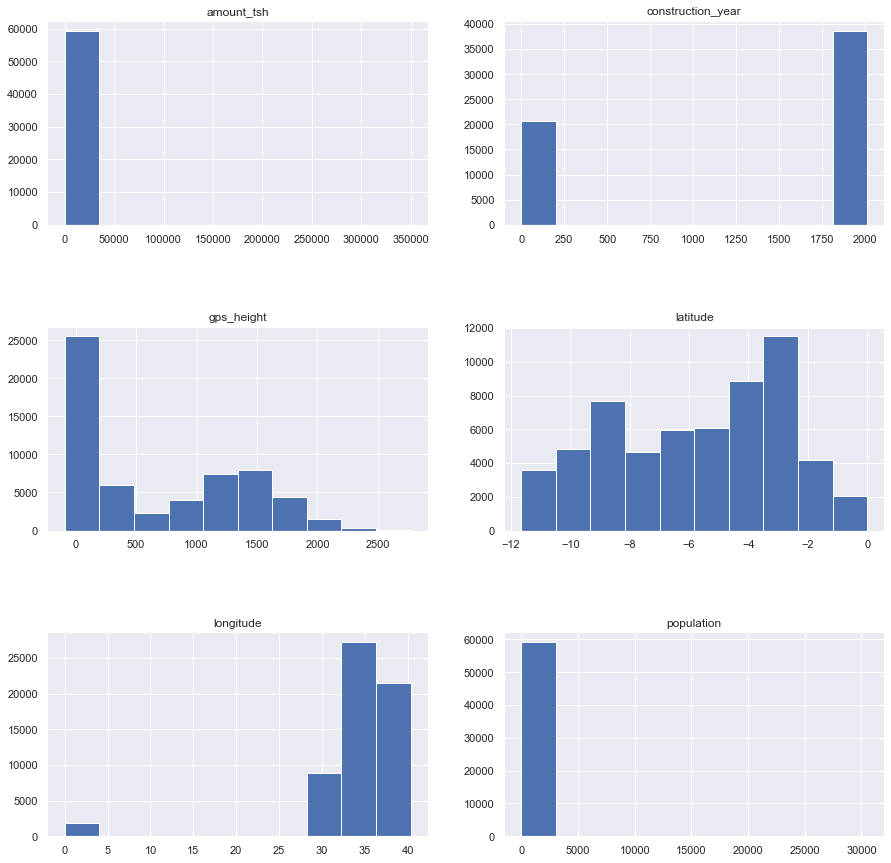

In [13]:
sns.set()
df.loc[:,sensitive_num_features].hist()
fig = plt.gcf()
fig.set_size_inches(15,15)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

In [14]:
df['population'].value_counts().sort_index()

0        21381
1         7025
2            4
3            4
4           13
5           44
6           19
7            3
8           23
9           11
10         163
11           7
12          43
13          12
14          18
15         193
16           8
17           6
18          18
19           3
20         462
21           3
22           9
23          27
24          16
25         255
26          11
27           5
28           9
29           7
         ...  
5200         1
5300         1
5400         2
5500         2
5550         1
5560         1
5600         3
6000        15
6300         1
6302         1
6330         1
6500         7
6800         1
6854         1
6922        30
7000         2
7500         3
7530         1
8000         5
8200         1
8500         1
8600         1
8848         1
9000         3
9500         1
9865         1
10000        3
11463        1
15300        1
30500        1
Name: population, Length: 1049, dtype: int64

In [15]:
df['construction_year'].value_counts().sort_index()

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176
Name: construction_year, dtype: int64

In [16]:
df['amount_tsh'].value_counts().sort_index()

0.00         41639
0.20             3
0.25             1
1.00             3
2.00            13
5.00           376
6.00           190
7.00            69
9.00             1
10.00          806
12.00            1
15.00           15
20.00         1463
25.00          356
26.00            1
30.00          743
33.00           20
35.00            8
40.00           59
50.00         2472
53.00            1
59.00            1
60.00           15
70.00           23
100.00         816
150.00          21
200.00        1220
220.00           1
250.00         569
300.00         557
             ...  
8000.00         61
8500.00          1
9000.00          3
10000.00        57
11000.00         2
12000.00        51
13000.00         2
14000.00         4
15000.00        16
16000.00         2
16300.00         2
18000.00         4
20000.00        45
25000.00         9
26000.00         2
30000.00         8
38000.00         1
40000.00         7
45000.00         3
50000.00         4
60000.00         1
70000.00    

In [17]:
df['gps_height'].value_counts().sort_index()

-90       1
-63       2
-59       1
-57       1
-55       1
-54       1
-53       1
-52       2
-51       2
-50       5
-49       4
-48       6
-47       8
-46       6
-45       9
-44       6
-43      11
-42      13
-41      11
-40      26
-39      14
-38      17
-37      19
-36      24
-35      18
-34      18
-33      22
-32      24
-31      26
-30      26
         ..
 2469     1
 2475     1
 2484     1
 2491     1
 2501     1
 2506     1
 2509     2
 2521     1
 2523     1
 2535     1
 2536     1
 2539     1
 2545     1
 2552     1
 2554     2
 2557     1
 2559     1
 2560     2
 2566     1
 2567     1
 2568     1
 2569     1
 2576     1
 2585     1
 2614     1
 2623     1
 2626     2
 2627     1
 2628     1
 2770     1
Name: gps_height, Length: 2428, dtype: int64

In [18]:
df['longitude'].value_counts().sort_index()

0.000000     1812
29.607122       1
29.607201       1
29.610321       1
29.610965       1
29.611947       1
29.612507       1
29.612763       1
29.613443       1
29.616872       1
29.618479       1
29.630583       1
29.638815       1
29.638904       1
29.639026       1
29.640156       1
29.640411       1
29.640963       1
29.641149       1
29.642162       1
29.642201       1
29.642269       1
29.642488       1
29.642861       1
29.643541       1
29.643546       1
29.643579       1
29.643938       1
29.644221       1
29.644315       1
             ... 
40.286679       1
40.287471       1
40.295239       1
40.298026       1
40.300378       1
40.301214       1
40.301987       1
40.301999       1
40.303795       1
40.304418       1
40.305421       1
40.305644       1
40.311031       1
40.311540       1
40.319699       1
40.320419       1
40.320693       1
40.320693       1
40.320693       1
40.320699       1
40.321966       1
40.322169       1
40.322625       1
40.322805       1
40.322832 

#### As we can see above, we have 1812 counts of 0 value for longitude which is not correct for Tanzania. [Map of Tanzania with latitude and longitude](https://www.worldatlas.com/img/areamap/44fb0cbaa5eb7ba2770b00485a23d97a.gif). You can also find more information about Tanzania using this [link](https://www.worldatlas.com/webimage/countrys/africa/tz.htm)

In [19]:
df['latitude'].value_counts().sort_index()

-1.164944e+01       1
-1.164838e+01       1
-1.158630e+01       1
-1.156858e+01       1
-1.156680e+01       1
-1.156451e+01       1
-1.156432e+01       1
-1.156232e+01       1
-1.156229e+01       1
-1.156162e+01       1
-1.156105e+01       1
-1.156055e+01       1
-1.155749e+01       1
-1.155728e+01       1
-1.155703e+01       1
-1.155639e+01       1
-1.155413e+01       1
-1.155317e+01       1
-1.153953e+01       1
-1.153842e+01       1
-1.153833e+01       1
-1.153785e+01       1
-1.153707e+01       1
-1.153679e+01       1
-1.152131e+01       1
-1.151494e+01       1
-1.151389e+01       1
-1.151323e+01       1
-1.151176e+01       1
-1.151079e+01       1
                 ... 
-1.021558e+00       1
-1.016317e+00       1
-1.015149e+00       1
-1.013978e+00       1
-1.013626e+00       1
-1.011835e+00       1
-1.010717e+00       1
-1.009458e+00       1
-1.008978e+00       1
-1.008346e+00       1
-1.007073e+00       1
-1.006552e+00       1
-1.006140e+00       1
-1.005107e+00       1
-1.004616e

In [20]:
df[df['amount_tsh']==0].groupby(df['quantity']).size()

quantity
dry              5516
enough          21103
insufficient    10914
seasonal         3411
unknown           695
dtype: int64

### We see above that the we have *'amount_tsh'* == 0 (amount water available to waterpoint) and this doesn't make sense when the *'quantity'* is not 'dry'. I'll assume that 0 value in *'amount_tsh'* means we are missing values in this feature and we need to handle it.

### Now let's compare the *status_group* feature with other numerical features to see if we can find a trend

In [21]:
df[['amount_tsh']].groupby(df['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

In [22]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [23]:
df['funder'].unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [24]:
df['lga'].unique()

array(['Ludewa', 'Serengeti', 'Simanjiro', 'Nanyumbu', 'Karagwe',
       'Mkinga', 'Shinyanga Rural', 'Kahama', 'Tabora Urban', 'Mkuranga',
       'Namtumbo', 'Maswa', 'Siha', 'Meatu', 'Sumbawanga Rural', 'Njombe',
       'Ukerewe', 'Bariadi', 'Same', 'Kigoma Rural', 'Moshi Rural',
       'Lindi Rural', 'Rombo', 'Chamwino', 'Bagamoyo', 'Mafia',
       'Arusha Rural', 'Kyela', 'Kondoa', 'Kilolo', 'Kibondo', 'Makete',
       'Singida Rural', 'Masasi', 'Rungwe', 'Moshi Urban', 'Geita',
       'Mbulu', 'Bukoba Rural', 'Muheza', 'Lushoto', 'Meru', 'Iramba',
       'Kilombero', 'Mbarali', 'Kasulu', 'Bukoba Urban', 'Korogwe',
       'Bukombe', 'Morogoro Rural', 'Kishapu', 'Musoma Rural',
       'Sengerema', 'Iringa Rural', 'Muleba', 'Dodoma Urban', 'Ruangwa',
       'Hanang', 'Misenyi', 'Missungwi', 'Songea Rural', 'Tanga',
       'Tunduru', 'Hai', 'Mwanga', 'Chato', 'Biharamulo', 'Ileje',
       'Mpwapwa', 'Mvomero', 'Bunda', 'Kiteto', 'Longido', 'Urambo',
       'Mbozi', 'Sikonge', 'Ilala',

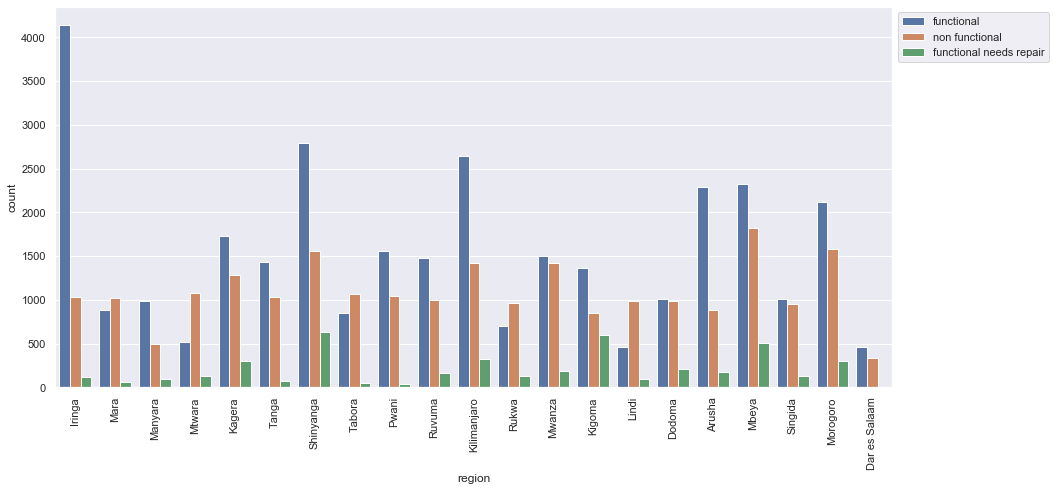

In [63]:
plt.figure(figsize=(15,7))
_ = sns.countplot(data=df,x='region',hue='status_group')
_.set_xticklabels(_.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [26]:
df['basin'].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

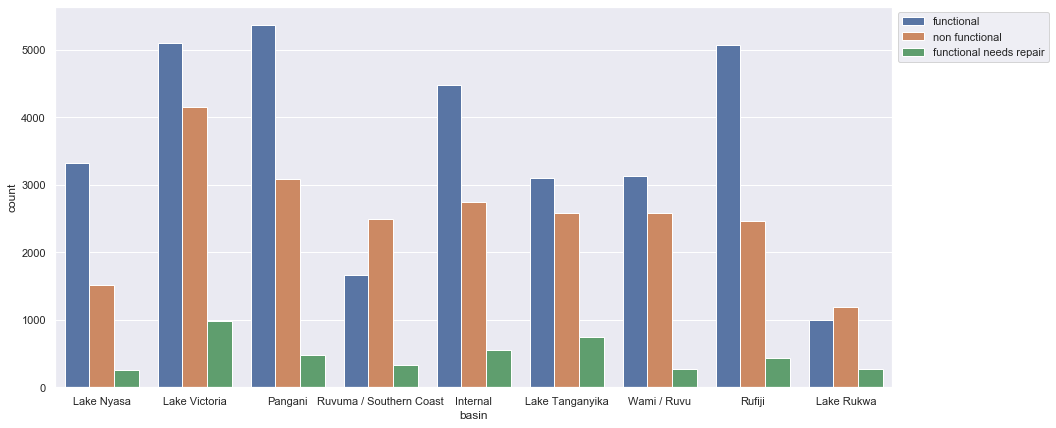

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='basin',hue='status_group')
plt.legend(bbox_to_anchor=(1,1), loc=2)